In [2]:
from DiabetesModels import *

# Parameters for simulation
environment = read_env(ndim=3)

# Setup simulation from env dict
simulation = Simulation(environment._asdict())
# Get idea of paars to change
environment

# Turn notebook into script
# !jupyter nbconvert --to script config_template.ipynb


env(path='debug/', maxPatient=1000, patientNr=1001, path_to_simulations='simulations/', nMeals=200, ndim=3, loss_fun='CGP', jupyter=True, hypoglycemia=5, target=5, patient_filter=True)

In [8]:
!jupyter nbconvert --to script run_doctor_3d.ipynb
!mv run_doctor_3d.py simulations/

[NbConvertApp] Converting notebook run_doctor_3d.ipynb to script
[NbConvertApp] Writing 1687 bytes to run_doctor_3d.py


In [3]:
# Change parameters of simulation here if you want to
# look above!
# simulation.par = xxx
# simulation.patientNr = 622
simulation.loss_fun = 'CGP'
simulation.nMeals = 200
simulation.patient_filter = True
simulation.hypoglycemia = 5.0
simulation.target = 5.0
## Initiate simulation for patient

# print environment for debugging purposes
simulation_tuple = namedtuple('debug_tuple', simulation.__dict__)
print(simulation_tuple(**simulation.__dict__))

debug_tuple(path='debug/', maxPatient=1000, patientNr=622, path_to_simulations='simulations/', nMeals=200, ndim=3, loss_fun='CGP', jupyter=True, hypoglycemia=5.0, target=5.0, patient_filter=True)


In [4]:
### Init patient
simulation.init_patient()

In [5]:
# Bolus fun for RLS
def bolus_fun(Meal, simulation):
    patient = simulation.patient

    e = (patient.CGM[-1] - patient.target)/patient.ISF
    patient.ICR = ((Meal * patient.ICR * 1000)/(patient.ICR * 1000 * e + Meal)).item()/1000 # the 1000 are for mU -> U -> mU
    Bolus = Meal/patient.ICR

    return Bolus

In [6]:
### Do simulation
simulation.simulate(simulation.simulate_meals, bolus_fun = bolus_fun)

Simulating for PatientNr: 622: 100%|██████████| 200/200 [00:26<00:00,  7.63it/s]


No handles with labels found to put in legend.


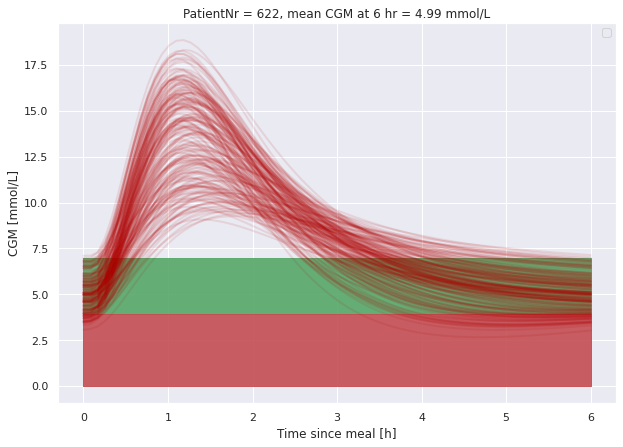

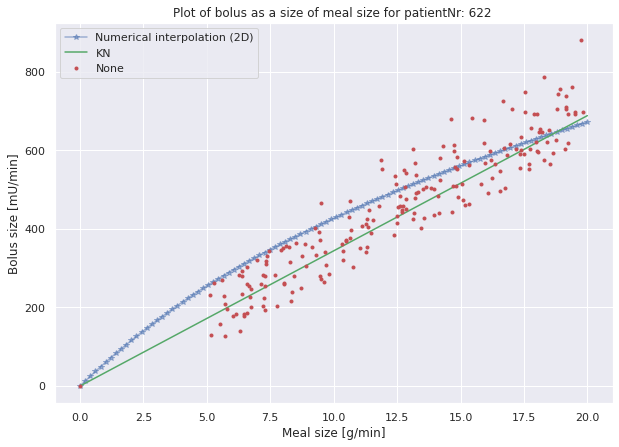

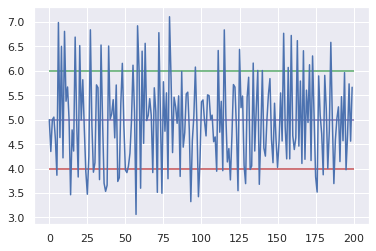

4.979454758812937 70.36111111111111 4.381944444444445


In [7]:
if simulation.jupyter:
    simulation.patient.set_u_opt()
    simulation.plot_CGM()
    simulation.make_u_opt_plot()

    plt.figure()
    plt.plot(simulation.nBG0)
    plt.hlines(6,0,200,'g')
    plt.hlines(5,0,200,'m')
    plt.hlines(4,0,200,'r')
    plt.show()

    print(simulation.nBG0.mean(),simulation.nTIR.mean(), simulation.nTBR.mean())
    